# COVID-19 Andamento Nazionale

In [1]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import os
import matplotlib.dates as dates
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Per rimuovere la griglia dal grafico
# sns.set_style("white")

## Download data

In [3]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 10888 (delta 56), reused 60 (delta 44), pack-reused 10801
Receiving objects: 100% (10888/10888), 275.80 MiB | 9.41 MiB/s, done.
Resolving deltas: 100% (8716/8716), done.
Updating files: 100% (1914/1914), done.


## Read data

In [4]:
# Nazionale
country_df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data', parse_dates=True)

In [5]:
# Regionale
regione = 'Piemonte'
country_df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', index_col='data', parse_dates=True)
group = country_df.groupby('denominazione_regione')['denominazione_regione'].count()
country_df = country_df.loc[country_df['denominazione_regione'] == regione]

In [7]:
country_df.drop(['stato', 'note'], axis=1, inplace=True)

In [8]:
country_df.tail()

,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati
data,,,,,,,,,,,,,,,,,,
2020-10-03 17:00:00,1,Piemonte,45.073274,7.680687,214,12,226,3051,3277,217,279,28567,4166,23810.0,12200.0,36010,739155,442510.0
2020-10-04 17:00:00,1,Piemonte,45.073274,7.680687,216,13,229,3141,3370,93,173,28646,4167,23920.0,12263.0,36183,744159,446474.0
2020-10-05 17:00:00,1,Piemonte,45.073274,7.680687,273,15,288,3135,3423,53,129,28721,4168,23944.0,12368.0,36312,748061,447344.0
2020-10-06 17:00:00,1,Piemonte,45.073274,7.680687,293,15,308,3274,3582,159,259,28819,4170,23999.0,12572.0,36571,756165,452847.0
2020-10-07 17:00:00,1,Piemonte,45.073274,7.680687,297,15,312,3412,3724,142,287,28962,4172,24075.0,12783.0,36858,763688,456021.0


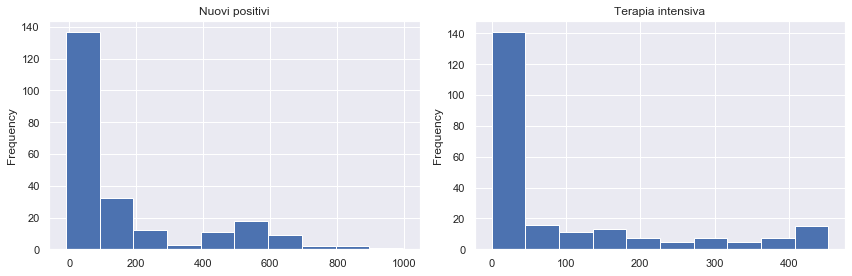

In [9]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

country_df['nuovi_positivi'].plot.hist(bins=10, ax=axes[0], title='Nuovi positivi')
country_df['terapia_intensiva'].plot.hist(bins=10, ax=axes[1], title='Terapia intensiva')

plt.tight_layout()

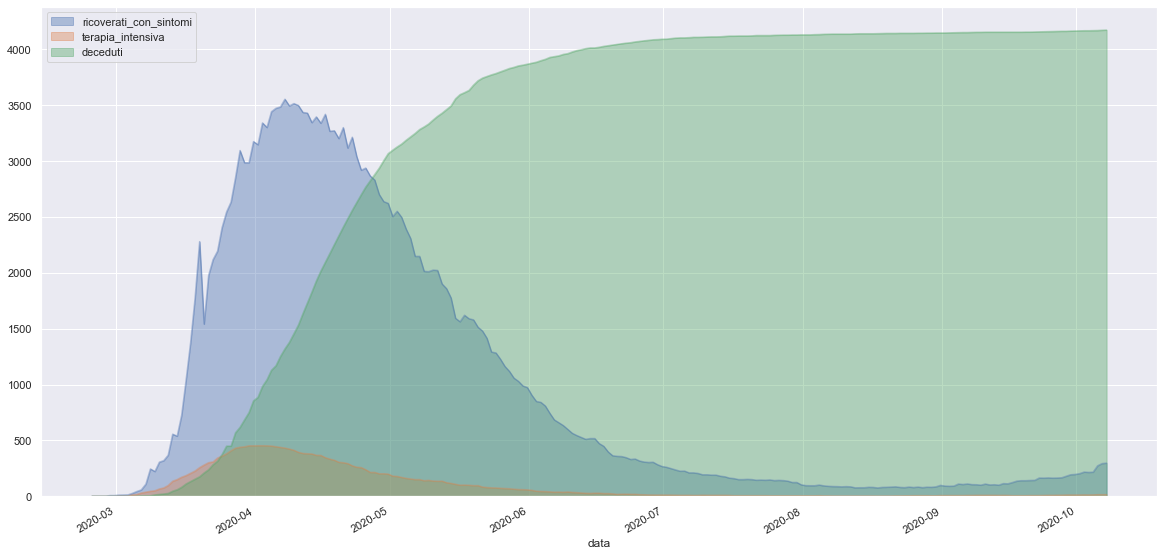

In [15]:
#country_df.plot.area(alpha=0.4, figsize=(20,10),stacked=False)
country_df[['ricoverati_con_sintomi', 'terapia_intensiva', 'deceduti']].plot.area(alpha=0.4, figsize=(20,10),stacked=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


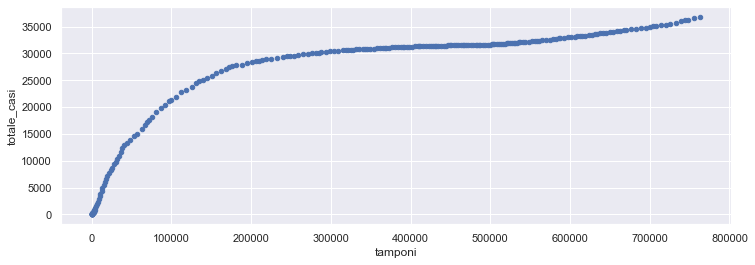

In [11]:
country_df.plot.scatter(x='tamponi',y='totale_casi', figsize=(12,4))

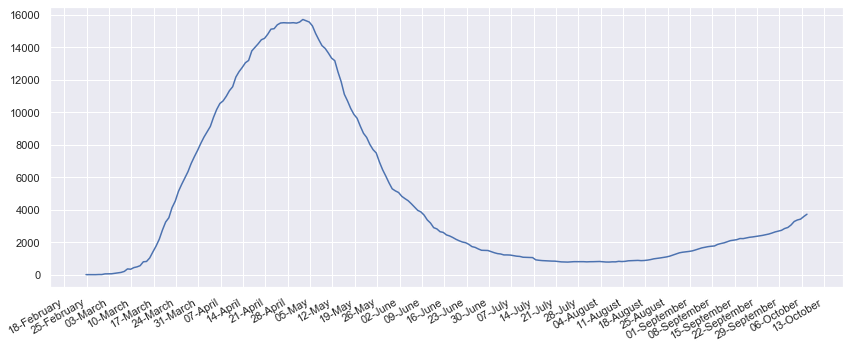

In [16]:
#country_df['totale_positivi'].plot(figsize=(12,5))


fig, ax = plt.subplots(figsize=(12,5))
ax.plot_date(country_df.index, country_df['totale_positivi'],'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%B'))

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()


### Variazione del totale di positivi (il numero deve diventare negativo)

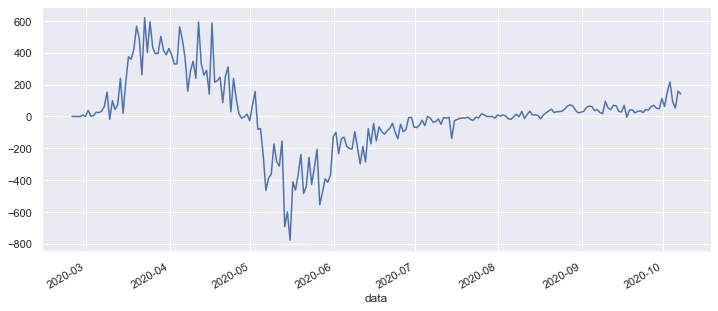

In [17]:
country_df['variazione_totale_positivi'].plot(figsize=(12,5))

### Nuove persone positive

In [18]:
country_df['nuovi_positivi'].tail()

data
2020-10-03 17:00:00    279
2020-10-04 17:00:00    173
2020-10-05 17:00:00    129
2020-10-06 17:00:00    259
2020-10-07 17:00:00    287
Name: nuovi_positivi, dtype: int64

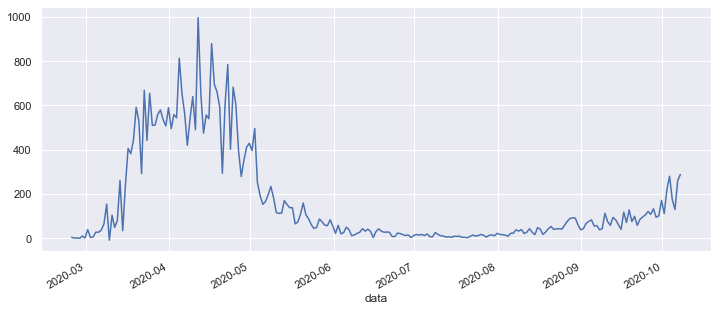

In [19]:
fig = country_df['nuovi_positivi'].plot(figsize=(12,5))
#plt.savefig('nuovi_positivi_lombardia.png')

### Tamponi

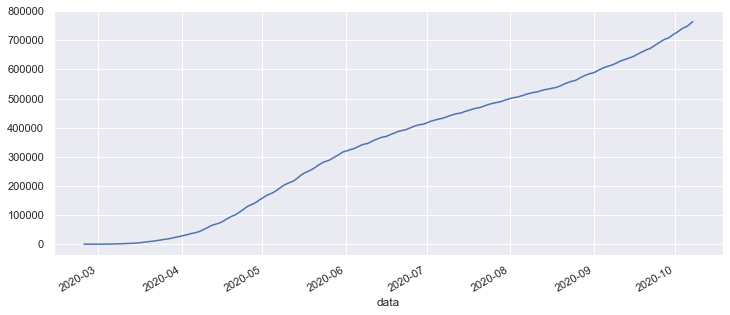

In [20]:
country_df['tamponi'].plot(figsize=(12,5))

#### Incremento giornaliero di tamponi

In [21]:
country_df['daily_tamponi'] = country_df['tamponi'] - country_df['tamponi'].shift(1)

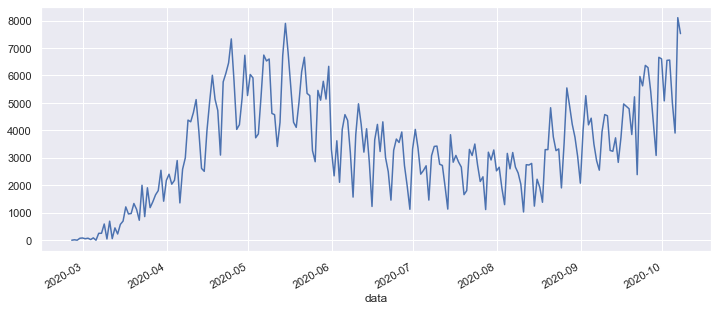

In [22]:
country_df['daily_tamponi'].plot(figsize=(12,5))

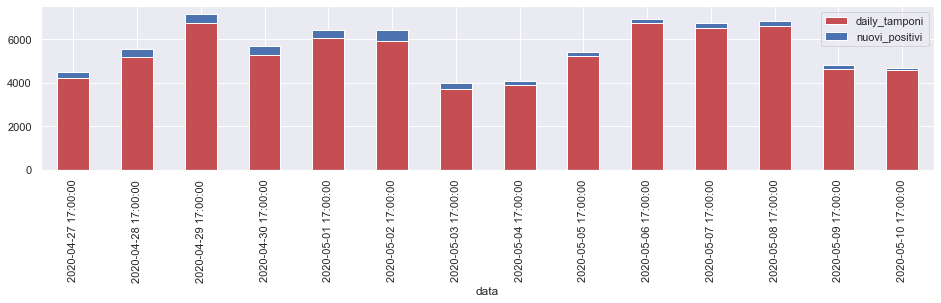

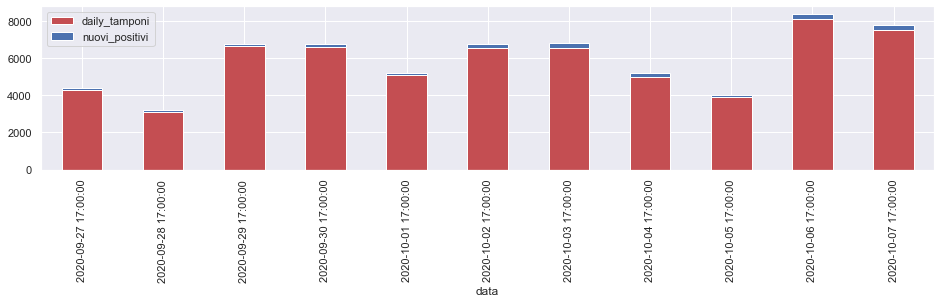

In [28]:
tamponi_df = country_df[['daily_tamponi','nuovi_positivi']]
tamponi_df.loc['2020-04-27':'2020-05-10'].plot.bar(stacked=True, figsize=(16,3),color=['r','b']);
tamponi_df.loc['2020-09-27':'2020-10-07'].plot.bar(stacked=True, figsize=(16,3),color=['r','b']);

### Nuovi positivi in relaziona ai tamponi fatti

In [29]:
#country_df.head()

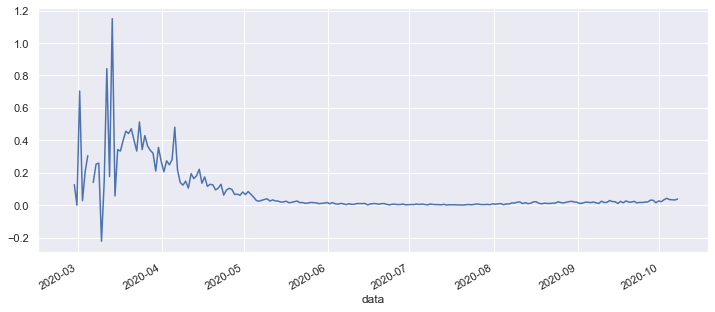

In [30]:
country_df['normed tamponi'] = country_df['nuovi_positivi'] / country_df['daily_tamponi']
country_df['normed tamponi'].plot(figsize=(12,5))